In [54]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [3]:
from google.colab import files

In [4]:
uploaded=files.upload()


Saving blockchaindata_sample.csv to blockchaindata_sample.csv


In [5]:
import io
df=pd.read_csv(io.StringIO(uploaded['blockchaindata_sample.csv'].decode('utf-8')))

In [6]:
df.head()

,blockchainid,blockid,productid,ProductName,Glass,Plastic,Nickel,Aluminium,Copper,Magnesium,Lead,year,from,to,CO2 emission
0,0,0,0,iPhone XR,39,68,3,47,12,14,13,2018,producer1,retailer1,562.11
1,1,0,1,Apple iPhone 4,27,48,2,33,8,10,9,2018,producer1,retailer1,394.69
2,2,0,2,Apple iPhone 7,28,48,2,33,8,10,9,2019,producer1,retailer1,395.24
3,3,0,3,Apple iPhone 4S,28,49,2,34,8,10,9,2019,producer1,retailer1,402.04
4,4,0,4,Apple iPhone 6S,29,50,2,34,9,10,9,2020,producer1,retailer1,405.37


In [7]:
iphXR=df[df.ProductName=='iPhone XR'].sort_values(by=['year'])

In [8]:
iph4=df[df.ProductName=='Apple iPhone 4'].sort_values(by=['year'])

In [9]:
iph4s=df[df.ProductName=='Apple iPhone 4S'].sort_values(by=['year'])

In [10]:
iph6s=df[df.ProductName=='Apple iPhone 6S'].sort_values(by=['year'])

In [11]:
iph7=df[df.ProductName=='Apple iPhone 7'].sort_values(by=['year'])

In [12]:
iph8=df[df.ProductName=='Apple iPhone 8'].sort_values(by=['year'])

In [13]:
iph11=df[df.ProductName=='Apple iPhone 11'].sort_values(by=['year'])

In [46]:
iphXR.head(3)

,blockchainid,blockid,productid,ProductName,Glass,Plastic,Nickel,Aluminium,Copper,Magnesium,Lead,year,from,to,CO2 emission
10,0,4,0,iPhone XR,42,72,3,51,12,14,13,2017,producer1,recycler1,590.96
0,0,0,0,iPhone XR,39,68,3,47,12,14,13,2018,producer1,retailer1,562.11
9,0,3,0,iPhone XR,40,62,2,48,10,12,11,2019,retailer1,producer1,525.20


In [15]:
cad0=iphXR.loc[:,["year"]]
cad1=iphXR.loc[:,["year","CO2 emission"]]
cad2=iph4.loc[:,["year","CO2 emission"]]
cad3=iph4s.loc[:,["year","CO2 emission"]]
cad4=iph6s.loc[:,["year","CO2 emission"]]
cad5=iph7.loc[:,["year","CO2 emission"]]
cad6=iph8.loc[:,["year","CO2 emission"]]
cad7=iph11.loc[:,["year","CO2 emission"]]


No handles with labels found to put in legend.


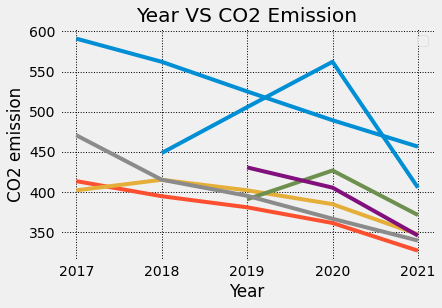

In [16]:
from matplotlib import rcParams

plt.plot(cad0,iphXR.loc[:,["CO2 emission"]])
plt.plot(cad0,iph4.loc[:,["CO2 emission"]])
plt.plot(iph4s.loc[:,["year"]],iph4s.loc[:,["CO2 emission"]])
plt.plot(iph8.loc[:,["year"]],iph8.loc[:,["CO2 emission"]])
plt.plot(cad0,iph7.loc[:,["CO2 emission"]])
plt.plot(iph6s.loc[:,["year"]],iph6s.loc[:,["CO2 emission"]])
plt.plot(iph11.loc[:,["year"]],iph11.loc[:,["CO2 emission"]])
plt.grid(True,color='k',linestyle=':')
plt.xlabel("Year")
plt.ylabel("CO2 emission")
plt.title("Year VS CO2 Emission")
plt.legend();
plt.show()

In [17]:
from pandas import Series

In [18]:
x1=cad1['CO2 emission']

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [20]:
train=cad1.iloc[:3]
test=cad1.iloc[3:]

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
cad1.head(),cad1.tail()

(    year  CO2 emission
 10  2017        590.96
 0   2018        562.11
 9   2019        525.20
 8   2020        489.31
 7   2021        456.45,     year  CO2 emission
 10  2017        590.96
 0   2018        562.11
 9   2019        525.20
 8   2020        489.31
 7   2021        456.45)

In [23]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [24]:
scaled_train[:10]

array([[0.        , 1.        ],
       [0.5       , 0.56128345],
       [1.        , 0.        ]])

In [25]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [26]:
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [27]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         1.         0.5        0.56128345]
Predict this y: 
 [[1. 0.]]


In [28]:

X.shape


(1, 2, 2)

In [29]:
n_input = 2
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [31]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit

<bound method Model.fit of <keras.engine.sequential.Sequential object at 0x7f1c2a4f9710>>

In [34]:
last_train_batch = scaled_train[-6:]

In [35]:
u=last_train_batch.flatten()
r=list(map(lambda el:[el], u))
v=np.array(r)

In [36]:
v

array([[0.        ],
       [1.        ],
       [0.5       ],
       [0.56128345],
       [1.        ],
       [0.        ]])

In [37]:
n_input=6
last_train_batch=v.reshape((1, n_input, n_features))

In [38]:
model.predict(last_train_batch)

array([[0.03177984]], dtype=float32)

In [39]:
scaled_test[0]

array([ 1.5       , -0.54577251])

In [40]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [41]:
test_predictions

[array([0.03177984], dtype=float32), array([0.02614892], dtype=float32)]

In [42]:
test_predictions

[array([0.03177984], dtype=float32), array([0.02614892], dtype=float32)]

In [52]:
train

,year,CO2 emission
10,2017,590.96
0,2018,562.11
9,2019,525.20


In [53]:
test

,year,CO2 emission
8,2020,489.31
7,2021,456.45
